In [1]:
import fastf1
fastf1.Cache.enable_cache('/Users/shivanireddy/Desktop/dataclasses/datastudio/project2/cache')  
race = fastf1.get_session(2022, 'Brazil', 'R')
import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)


In [3]:
laps = race.load_laps(with_telemetry=True)

/Users/shivanireddy/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for São Paulo Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/shivanireddy/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/shivanireddy/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/

In [4]:
laps_ham = laps.pick_driver('HAM')
laps_ver = laps.pick_driver('VER')
laps_rus = laps.pick_driver('RUS')

In [5]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings


situation       INFO 	cffi mode is CFFI_MODE.ANY
situation       INFO 	R home found: /opt/homebrew/Cellar/r/4.2.2/lib/R
situation       INFO 	R library path: 
situation       INFO 	LD_LIBRARY_PATH: 
embedded       INFO 	Default options to initialize R: rpy2, --quiet, --no-save
embedded       INFO 	R is already initialized. No need to initialize.


In [6]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [7]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return true;
}

<IPython.core.display.Javascript object>

In [8]:
%%R

require('tidyverse')

callbacks    WARNING 	R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [9]:
lap_telemetry_ham = laps.pick_driver('HAM').loc[laps.pick_driver('HAM')['LapNumber']==1].get_car_data().add_distance()
lap_telemetry_ver = laps.pick_driver('VER').loc[laps.pick_driver('VER')['LapNumber']==1].get_car_data().add_distance()
lap_telemetry_rus = laps.pick_driver('RUS').loc[laps.pick_driver('RUS')['LapNumber']==1].get_car_data().add_distance()

In [10]:
lap_telemetry_ham.to_csv('tellap1_ham.csv')
lap_telemetry_ver.to_csv('tellap1_ver.csv')
lap_telemetry_rus.to_csv('tellap1_rus.csv')

In [11]:
%%R 

tel_ham <- read_csv('tellap1_ham.csv')
tel_ver <- read_csv('tellap1_ver.csv')
tel_rus <- read_csv('tellap1_rus.csv')

New names:
• `` -> `...1`
Rows: 342 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Source, Time, SessionTime
dbl  (7): ...1, RPM, Speed, nGear, Throttle, DRS, Distance
lgl  (1): Brake
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 347 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Source, Time, SessionTime
dbl  (7): ...1, RPM, Speed, nGear, Throttle, DRS, Distance
lgl  (1): Brake
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 334 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (

In [28]:
%%R
tel_combined <- rbind(tel_ver, tel_ham, tel_rus)
tel_combined$Driver <- c(rep("VER", nrow(tel_ver)), rep("HAM", nrow(tel_ham)), rep("RUS",nrow(tel_rus)))


   [1]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [37]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FAL

In [23]:
%%R

speed <- ggplot(tel_combined, aes(x = Distance, y = Speed, color = Driver)) +
  geom_line(size = 0.6) + 
  labs(title = "Lap 1") + xlab("Distance in meters") +
  scale_color_manual(name = "Driver", labels = c("VER", "HAM","RUS"), values = c("green", "red", "blue")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(plot.subtitle = element_text(hjust = 0.5, size = )) +
  theme(legend.position = "bottom") + annotate("text", x = 550, y = 300, label = "", size = 3.5, color = 'black') +
  annotate("text", x = 4150, y = 275, label = "", size = 3.5, color = "black")


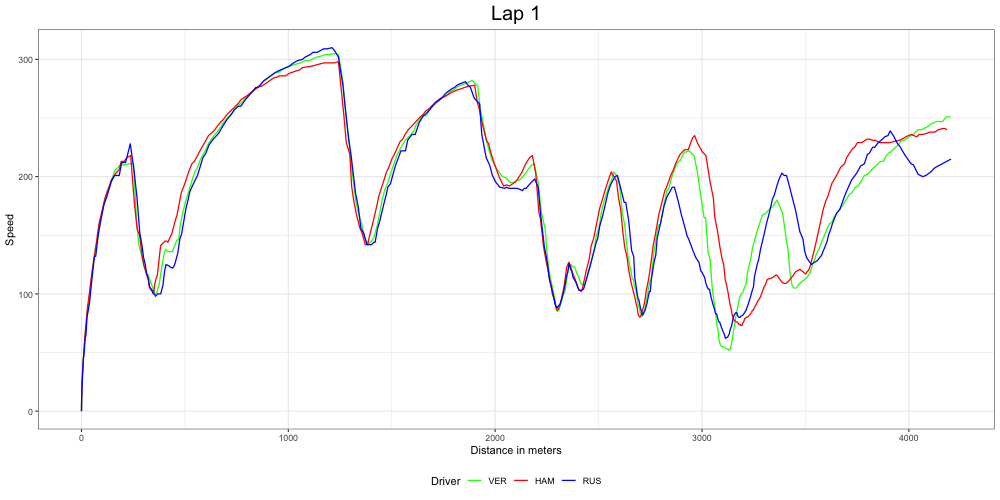

In [24]:
%%R -w 1000 -h 500
speed

In [25]:
%%R

brake <- ggplot(tel_combined, aes(x = Distance, y = Brake, color = Driver)) +
  geom_line(size = 0.6) + 
  labs(title = "Lap 1") + xlab("Distance in meters") +
  scale_color_manual(name = "Driver", labels = c("VER", "HAM","RUS"), values = c("green", "red", "blue")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(plot.subtitle = element_text(hjust = 0.5, size = )) +
  theme(legend.position = "bottom") + annotate("text", x = 550, y = 300, label = "", size = 3.5, color = 'black') +
  annotate("text", x = 4150, y = 275, label = "", size = 3.5, color = "black")


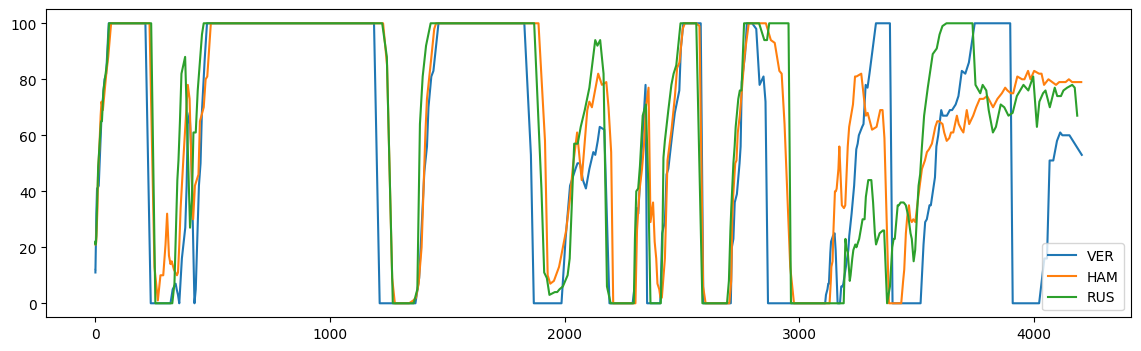

In [40]:
fig = plt.figure(figsize=(14, 4))
plt.plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Throttle'], label='VER')
plt.plot(lap_telemetry_ham['Distance'], lap_telemetry_ham['Throttle'], label='HAM')
plt.plot(lap_telemetry_rus['Distance'], lap_telemetry_rus['Throttle'], label='RUS')
plt.legend()
#plt.plot(telemetry_ham['Distance'], telemetry_ham['Brake'], label='HAM')
plt.savefig('lap1.svg', format='svg', dpi=1200)


